In [1]:
library(ggplot2)
library(dplyr)
library(stringr)
library(cowplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Reproducibility
Pearson correlation was calculated between contact maps of different proximity ligation methods in a pairwise fashion

In [4]:
df_b = read.table("../analysis/reproducibility/results/TechComparison_batch.txt")
colnames(df_b) = c("iid", "sample1", "sample2", "res", "hicrep", "pearson", "spearman")
df_b$sid = paste(df_b$sample1, df_b$sample2, sep="-vs-")

In [5]:
df_b$sid <- plyr::mapvalues(df_b$sid, names(table(df_b$sid)), c("HepG2-HEK293T", "K562-HEK293T", "K562-HepG2", 
                                                                "PARIS-HEK293T", "PARIS-HepG2", "PARIS-K562",
                                                                "PARIS-RIC", "RIC-HEK293T", "RIC-HepG2", "RIC-K562"))

In [6]:
head(df_b)

,iid,sample1,sample2,res,hicrep,pearson,spearman,sid
,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,NM_005381,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.5457736,0.9740143,0.7159519,HepG2-HEK293T
2,NM_002032,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.6269430,0.8502994,0.9012080,HepG2-HEK293T
3,NM_021009,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.9275044,0.8773467,0.7953968,HepG2-HEK293T
4,NM_000918,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.6028250,0.9442721,0.7279877,HepG2-HEK293T
5,NR_003023,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.5223742,0.9872402,0.9825864,HepG2-HEK293T
6,NM_000999,G1_kethoxal-HepG2_M13_B01,G1_kethoxal-HEK293T_M13_B01,100,0.9959529,0.9621584,0.9564248,HepG2-HEK293T


In [7]:
df_batch_mean = df_b %>% filter(res == 25) %>% group_by(sid) %>% summarize_at("pearson", mean)

# Add assay and cell line information
df_batch_mean$S1 <- str_split(df_batch_mean$sid, "-",  simplify=T)[,1]
df_batch_mean$S2 <- str_split(df_batch_mean$sid, "-",  simplify=T)[,2]

df_batch_mean$S1 <- factor(df_batch_mean$S1, levels=c("PARIS", "RIC", "K562", "HepG2", "HEK293T"))
df_batch_mean$S2 <- factor(df_batch_mean$S2, levels=rev(c("PARIS", "RIC", "K562", "HepG2", "HEK293T")))

# Add diagonal (pseudo-values)
df_batch_mean = rbind(as.data.frame(df_batch_mean),
                      data.frame(sid=c("PARIS-PARIS", "RIC-RIC", "K562-K562", "HEK293T-HEK293T", "HepG2-HepG2"),
                                 pearson=c(1.0, 1.0, 1.0, 1.0, 1.0),
                                 S1=c("PARIS", "RIC", "K562", "HepG2", "HEK293T"), 
                                 S2=c("PARIS", "RIC", "K562", "HepG2", "HEK293T")))

In [14]:
df_batch_mean

sid,pearson,S1,S2
<chr>,<dbl>,<fct>,<fct>
HepG2-HEK293T,0.8849561,HepG2,HEK293T
K562-HEK293T,0.8466216,K562,HEK293T
K562-HepG2,0.8692721,K562,HepG2
PARIS-HEK293T,0.2857081,PARIS,HEK293T
PARIS-HepG2,0.3013035,PARIS,HepG2
PARIS-K562,0.3206566,PARIS,K562
PARIS-RIC,0.2792570,PARIS,RIC
RIC-HEK293T,0.5884959,RIC,HEK293T
RIC-HepG2,0.5747693,RIC,HepG2


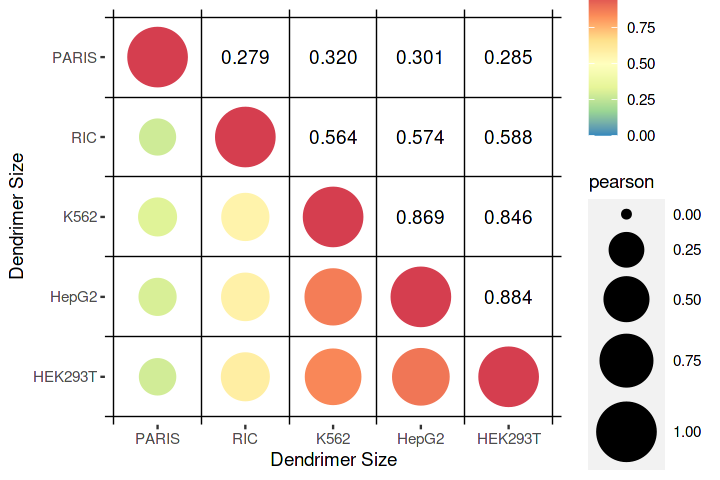

In [13]:
options(repr.plot.height=4, repr.plot.width=6)
p3 <- ggplot(df_batch_mean) + 
        geom_point(mapping=aes(x=S1, y=S2, size=pearson, color=pearson)) +
        scale_size(limits=c(0.0, 1.0), range=c(2,16)) +
        scale_color_distiller(palette="Spectral", limits=c(0.0, 1.0)) +
        geom_vline(xintercept=c(0.5, 1.5, 2.5, 3.5, 4.5, 5.5), size=0.3) +
        geom_hline(yintercept=c(0.5, 1.5, 2.5, 3.5, 4.5, 5.5), size=0.3) +
        annotate("text", x = 2, y = 5, label = "0.279") +
        annotate("text", x = 3, y = 5, label = "0.320") +
        annotate("text", x = 4, y = 5, label = "0.301") +
        annotate("text", x = 5, y = 5, label = "0.285") +
        annotate("text", x = 3, y = 4, label = "0.564") +
        annotate("text", x = 4, y = 4, label = "0.574") +
        annotate("text", x = 5, y = 4, label = "0.588") +
        annotate("text", x = 4, y = 3, label = "0.869") +
        annotate("text", x = 5, y = 3, label = "0.846") +
        annotate("text", x = 5, y = 2, label = "0.884") +
        xlab("Dendrimer Size") + ylab("Dendrimer Size") +
        theme(panel.background = element_blank())
#ggsave("Fig02_TechComparison.png", height=6, width=8, dpi=300)
p3